In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_63307_G')

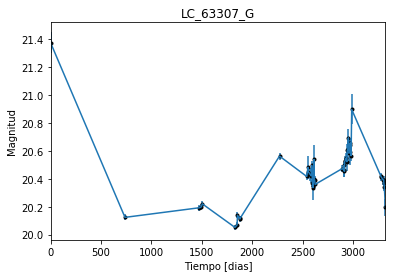

In [2]:
data = np.genfromtxt('LC_63307_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_63307_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

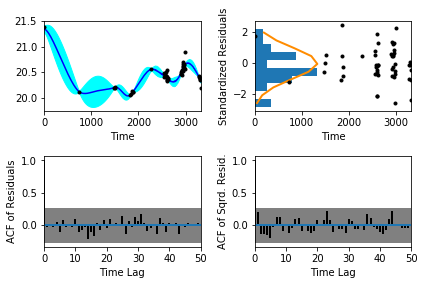

In [5]:
sample.assess_fit()

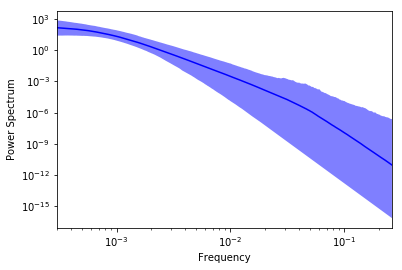

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_63307_G')

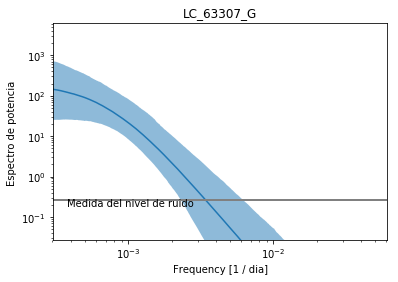

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_63307_G')

Text(0.5,1,'Prediccion , valor esperado LC_63307_G')

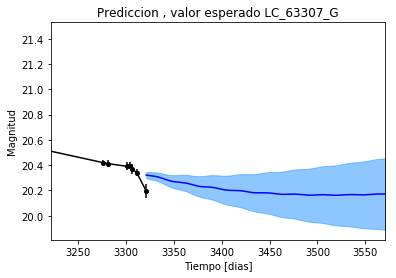

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_63307_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_63307_G')

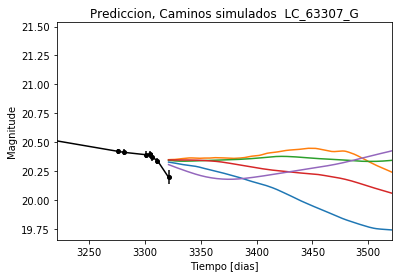

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_63307_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_63307_G')

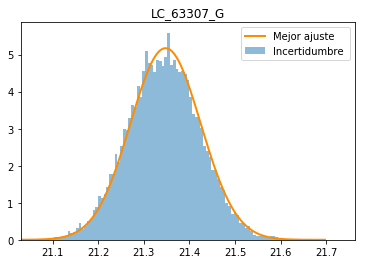

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_63307_G')

Text(0.5,1,'Interpolacion, camino simulado LC_63307_G')

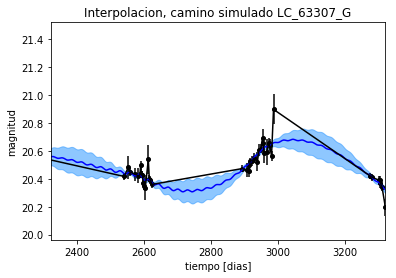

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63307_G')

Text(0.5,1,'Interpolacion, camino simulado LC_63307_G')

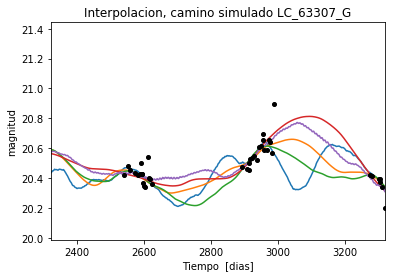

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63307_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 476.729990257
Median: 0.00518205559743
Standard deviation: 0.0957233474137
68% credibility interval: [ 0.00060812  0.08862643]
95% credibility interval: [  3.36096634e-04   3.82488430e-01]
99% credibility interval: [  3.06767004e-04   4.97315029e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 807.328163696
Median: 0.000976269601069
Standard deviation: 0.037720331711
68% credibility interval: [ 0.00041458  0.01051164]
95% credibility interval: [ 0.0003157   0.10385038]
99% credibility interval: [ 0.00030299  0.27482152]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 306.987720792
Median: 0.00274538601681
Standard deviati

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2017.8851171
Median: 84.4982197328
Standard deviation: 1.51654644588
68% credibility interval: [ 82.78711295  85.51735633]
95% credibility interval: [ 80.40996403  86.1432353 ]
99% credibility interval: [ 78.38018414  86.70828299]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 491.278120792
Median: 0.277855240281
Standard deviation: 1.02836736209
68% credibility interval: [ 0.02488944  1.71883763]
95% credibility interval: [ 0.01075223  3.5233867 ]
99% credibility interval: [ 0.00915004  4.82057329]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 660.548847291
Median: 0.0800706660516
Standard deviation: 1.96522872061
68% credibility interval: [ 0.00521931  1.43517812]
95% credibility interval: [  2.88458254e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.1148778
Median: 1.92478788867e-33
Standard deviation: 5.16192735343e+34
68% credibility interval: [  2.00240822e-58   1.87312686e-06]
95% credibility interval: [  1.65593493e-141   1.05764641e+004]
99% credibility interval: [  2.29512359e-173   4.03564651e+023]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2321.51092891
Median: 20.4590861663
Standard deviation: 0.275749438435
68% credibility interval: [ 20.24894899  20.69983767]
95% credibility interval: [ 19.93669596  21.05955821]
99% credibility interval: [ 19.60513675  21.39432427]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 264.427732984
Median: 0.00113777698992
Standard deviation: 0.112202909324
68% credibility interval: [ 0.          0.13830239]
95% credibility interval: [ 0.          0.41590641]
99% credibility interval: [ 0.          0.49617187]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 264.427732984
Median: 0.00113777698992
Standard deviation: 0.112202909324
68% credibility interval: [ 0.          0.13830239]
95% credibility interval: [ 0.          0.41590641]
99% credibility interval: [ 0.          0.49617187]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 552.659994061
Median: 0.0
Standard deviation: 0.000275281640156
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2017.8851171
Median: 84.4982197328
Standard deviation: 1.51654644588
68% credibility interval: [ 82.78711295  85.51735633]
95% credibility interval: [ 80.40996403  86.1432353 ]
99% credibility interval: [ 78.38018414  86.70828299]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2784.85034478
Median: 0.233876292684
Standard deviation: 0.27865639311
68% credibility interval: [ 0.12772849  0.47738449]
95% credibility interval: [ 0.0775462   1.01591602]
99% credibility interval: [ 0.0580017   1.73549932]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1948.32556216
Median: 1.14756937124
Standard deviation: 0.184660028193
68% credibility interval: [ 0.98116291  1.33896392]
95% credibility interval: [ 0.84264802  1.57526095]
99% credibility interval: [ 0.77298624  1.75205222]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1360.28506066
Median: 2.11706272832e-05
Standard deviation: 0.00113192056909
68% credibility interval: [  8.65227672e-07   4.34404183e-04]
95% credibility interval: [  9.85523413e-09   2.38070988e-03]
99% credibility interval: [  3.63676836e-27   5.46564636e-03]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 476.729990257
Median: (-0.0325598155908+0j)
Standard deviation: 0.926688938076
68% credibility interval: [-0.55685626+0.j         -0.00382090-0.00586211j]
95% credibility interval: [ -2.40324569e+00-3.08406906j  -2.11175743e-03-0.00651688j]
99% credibility interval: [ -3.12472249e+00-1.42041924j  -1.92747393e-03-0.00342192j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 807.328163696
Median: (-0.00613408281328+0.0269624197762j)
Standard deviation: 0.743763452925
68% credibility interval: [-0.06604660+1.40280249j -0.00260487+0.18255794j]
95% credibility interval: [-0.65251119+1.941031j -0.00198362+0.j      ]
99% credibility interval: [-1.72675454+1.36364636j -0.00190377+0.00319484j]
Posterior summary for parameter ar_